# Phase- 4

In this pahse i will work on Machine Learning Algorithms for Clustering, for further Analysis. 

In [2]:
# importing some important library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# this is district wise all data
dist=pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')

In [4]:
dist.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


This is District wise all data including all types of crimes in whole India. 

In [5]:
dist= dist[dist['DISTRICT'] != 'TOTAL']
dist= dist[dist['DISTRICT']!= 'DELHI UT TOTAL']

In [6]:
dist.shape

(8597, 33)

In [7]:
dist

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9021,DELHI UT,STF,2012,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6
9022,DELHI UT,WEST,2012,52,37,10,79,0,79,454,...,18,227,18,53,6,327,0,292,1144,5558
9024,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9026,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787


# 4.1  "Create 3 clusters as below.
* 1. Sensitive Area
* 2. Moderate Area
* 3. Peaceful Area

In [8]:
dist.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

# KMeans Algorithm

In [9]:
from sklearn.cluster import KMeans

# Prepare data for clustering (select relevant features)
X = dist[['MURDER', 'RAPE', 'KIDNAPPING & ABDUCTION', 'DACOITY', 'ROBBERY']]

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the dataset
dist['Cluster'] = clusters

# 4.2  Create DataFrame for each cluster that shows data according to the areas.

In [10]:
# Separate data into clusters
sen = dist[dist['Cluster'] == 0]   # sen-> senitive area
mod = dist[dist['Cluster'] == 1]   # mod-> moderate area
pea = dist[dist['Cluster'] == 2]   # pea-> peaceful area

# Save each cluster to a separate CSV file
# sen.to_csv('cluster_0.csv', index=False)
# mod.to_csv('cluster_1.csv', index=False)
# pea.to_csv('cluster_2.csv', index=False)

In [46]:
sen.to_csv('cluster_0.csv', index=False)
mod.to_csv('cluster_1.csv', index=False)
pea.to_csv('cluster_2.csv', index=False)

i devide our data in three part based on some columns ['MURDER','RAPE','KIDNAPPING & ABDUCTION','DACOITY','ROBBERY'] using KMeans Unsupervised ML algorithms 

In [11]:
# THIS IS SENSTIVE DISTRICT
sen

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Cluster
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,795,17,126,38,57,0,233,1181,3140,0
5,ANDHRA PRADESH,GUNTAKAL RLY.,2001,3,1,0,0,0,0,0,...,1,0,1,0,0,0,4,104,287,0
10,ANDHRA PRADESH,KRISHNA,2001,65,51,0,37,0,37,36,...,1985,10,208,72,265,0,268,862,4779,0
19,ANDHRA PRADESH,SECUNDERABAD RLY.,2001,6,0,0,0,0,0,0,...,17,1,0,1,0,0,6,68,439,0
20,ANDHRA PRADESH,SRIKAKULAM,2001,38,10,4,8,0,8,12,...,679,6,38,47,108,0,167,926,2572,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,DELHI UT,NEW DELHI,2012,9,6,1,5,0,5,28,...,16,0,29,7,4,0,67,302,1057,0
9021,DELHI UT,STF,2012,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,6,0
9024,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,0,1,0,1,0,0,32,60,0
9026,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,186,0,2,0,1,0,44,392,787,0


In [12]:
# THIS IS MODERATE DISTRICT
mod

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Cluster
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,1131,16,149,34,175,0,181,1518,4154,1
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,1543,7,118,24,154,0,270,754,4125,1
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,2088,14,112,83,186,0,404,1262,5818,1
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,1244,12,109,58,247,0,431,2313,6507,1
6,ANDHRA PRADESH,GUNTUR,2001,182,88,2,54,0,54,82,...,1792,7,139,129,378,0,369,2426,7848,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8991,WEST BENGAL,SILIGURI_PC,2012,32,6,6,21,0,21,123,...,812,3,35,12,370,0,69,385,3023,1
8998,CHANDIGARH,CHANDIGARH,2012,21,44,5,27,0,27,87,...,42,5,45,25,73,0,3,1042,3606,1
9006,DELHI UT,CENTRAL,2012,35,25,10,31,0,31,180,...,133,4,47,12,57,0,7,631,2973,1
9014,DELHI UT,NORTH,2012,25,17,2,14,0,14,153,...,92,6,29,10,70,0,13,927,2700,1


In [13]:
# THIS IS PEACEFUL DISTRICT
pea

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Cluster
102,BIHAR,PATNA,2001,434,581,30,27,0,27,197,...,354,90,47,0,152,39,178,2825,8583,2
255,KARNATAKA,BANGALORE COMMR.,2001,221,327,5,40,0,40,152,...,3735,40,223,51,229,0,38,11106,27254,2
370,MAHARASHTRA,MUMBAI,2001,295,200,6,127,0,127,148,...,3845,18,274,44,198,0,709,6095,28968,2
513,RAJASTHAN,JAIPUR,2001,91,90,6,61,0,61,247,...,1528,29,179,1,453,0,749,8173,20604,2
579,UTTAR PRADESH,AGRA,2001,153,162,18,66,0,66,203,...,518,63,110,114,327,0,234,2085,6662,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9016,DELHI UT,NORTH-WEST,2012,60,37,8,64,0,64,357,...,166,12,19,14,212,0,9,1253,4542,2
9017,DELHI UT,OUTER,2012,96,60,15,67,0,67,572,...,224,15,79,18,244,0,90,2006,6344,2
9019,DELHI UT,SOUTH-EAST,2012,46,69,6,116,0,116,538,...,252,11,160,43,123,0,218,2004,7040,2
9020,DELHI UT,SOUTH-WEST,2012,47,48,6,87,0,87,399,...,131,18,69,21,207,0,4,1387,4085,2


# 4.3  "Analyse your clusters and prepare a report that explains all your observations.

### 1 Sensitive Areas:

* Cluster 0 is characterized by high crime rates across multiple categories, including murder, rape, kidnapping, dacoity, and robbery.
* These areas exhibit a high level of criminal activity and may require immediate attention from law enforcement agencies.
* Factors contributing to the high crime rates in these areas need to be further investigated, such as socioeconomic conditions, law enforcement presence, etc.

### 2 Moderate Areas:

* Cluster 1 represents areas with moderate crime rates compared to sensitive areas.
* While crime rates are relatively lower than in sensitive areas, there's still a significant presence of various crimes such as murder, rape, and kidnapping.
* Strategies for crime prevention and community engagement could help maintain or further reduce crime rates in these areas.

### 3 Peaceful Areas:

* Cluster 2 comprises areas with the lowest crime rates among the three clusters.
* Crime rates in these areas are significantly lower across all categories, indicating a relatively safe environment.
* These areas may serve as examples of effective crime prevention strategies or positive community dynamics.

<Axes: title={'center': 'TOTAL CRIMES IN  SENSITIVE STATES/UT FROM 2001 TO 2012'}, xlabel='TOTAL IPC CRIMES', ylabel='DISTRICT'>

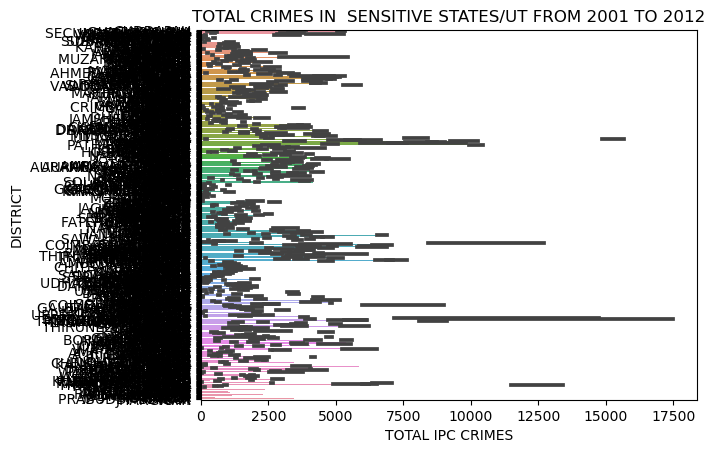

In [14]:
plt.title('TOTAL CRIMES IN  SENSITIVE STATES/UT FROM 2001 TO 2012')
sns.barplot(y='DISTRICT',x='TOTAL IPC CRIMES',data=sen)

<Axes: title={'center': ' TOTAL MURDER IN SENSITIVE STATES/UT FROM 2001 TO 2012'}, xlabel='MURDER', ylabel='DISTRICT'>

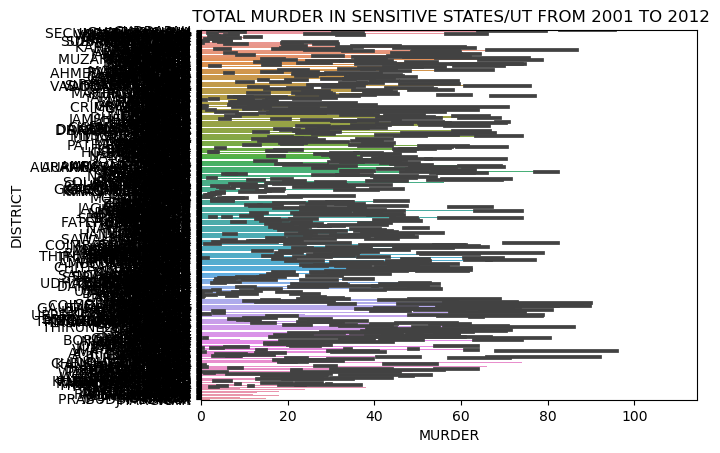

In [15]:
plt.title(' TOTAL MURDER IN SENSITIVE STATES/UT FROM 2001 TO 2012')
sns.barplot(y='DISTRICT',x='MURDER',data=sen)

<Axes: title={'center': ' TOTAL RAPE IN SENSITIVE STATES/UT FROM 2001 TO 2012'}, xlabel='RAPE', ylabel='DISTRICT'>

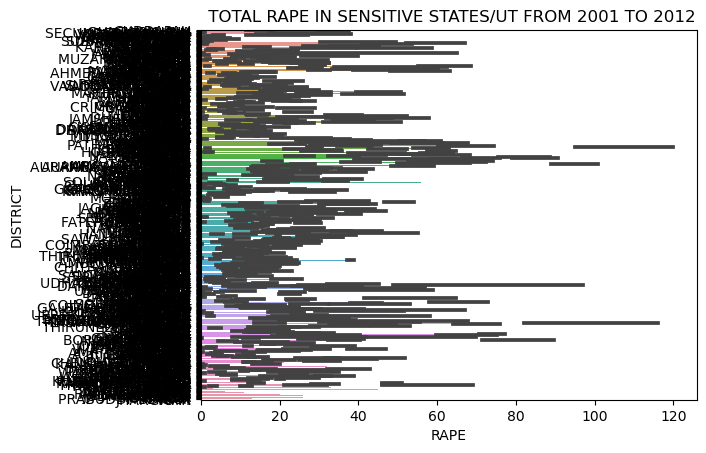

In [16]:
plt.title(' TOTAL RAPE IN SENSITIVE STATES/UT FROM 2001 TO 2012')
sns.barplot(y='DISTRICT',x='RAPE',data=sen)

<Axes: title={'center': ' TOTAL DACOITY IN SENSITIVE STATES/UT FROM 2001 TO 2012'}, xlabel='DACOITY', ylabel='DISTRICT'>

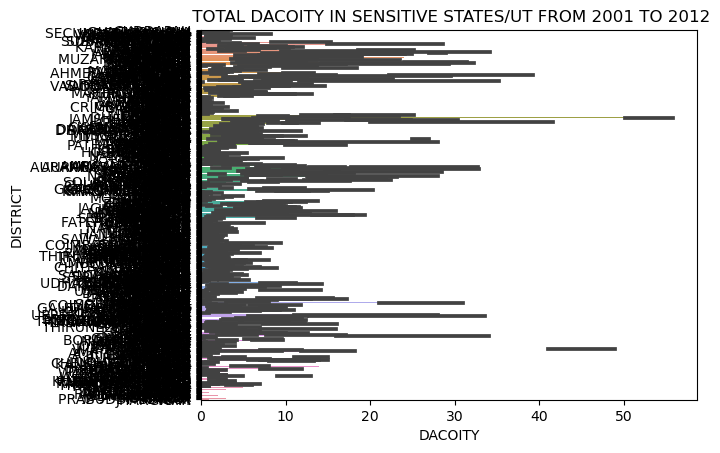

In [17]:
plt.title(' TOTAL DACOITY IN SENSITIVE STATES/UT FROM 2001 TO 2012')
sns.barplot(y='DISTRICT',x='DACOITY',data=sen)

<Axes: title={'center': 'TOTAL CRIMES MODERATE STATE  FROM 2001 TO 2012'}, xlabel='TOTAL IPC CRIMES', ylabel='DISTRICT'>

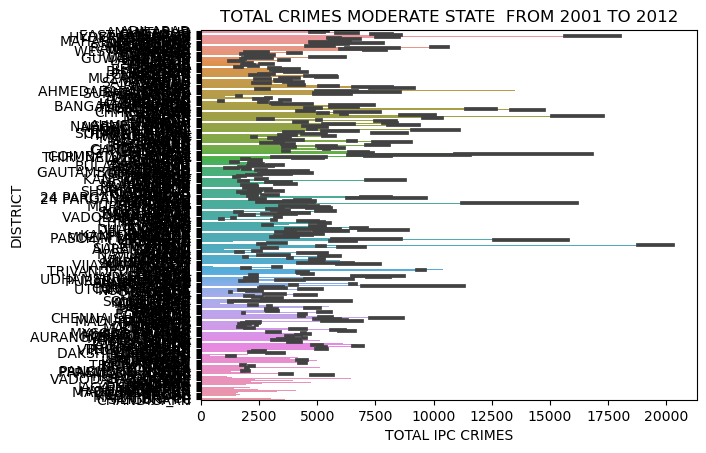

In [19]:
plt.title('TOTAL CRIMES MODERATE STATE  FROM 2001 TO 2012')
sns.barplot(y='DISTRICT',x='TOTAL IPC CRIMES',data=mod)

<Axes: title={'center': 'TOTAL MURDER IN MODERATE STATE  FROM 2001 TO 2012'}, xlabel='MURDER', ylabel='DISTRICT'>

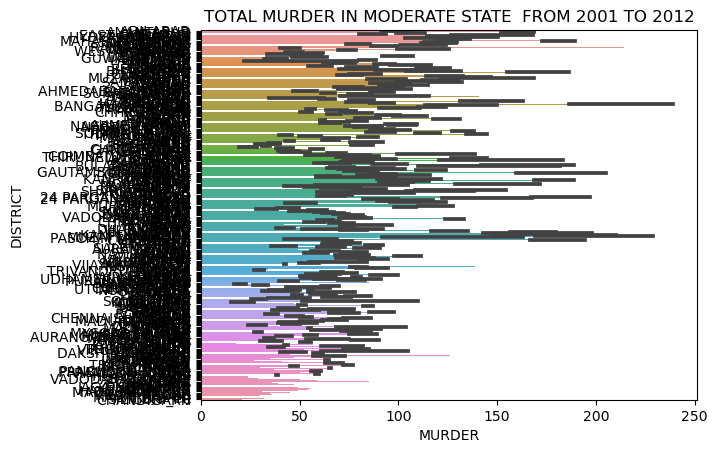

In [20]:
plt.title('TOTAL MURDER IN MODERATE STATE  FROM 2001 TO 2012')
sns.barplot(y='DISTRICT',x='MURDER',data=mod)

<Axes: title={'center': 'TOTAL RAPE IN MODERATE STATE  FROM 2001 TO 2012'}, xlabel='RAPE', ylabel='DISTRICT'>

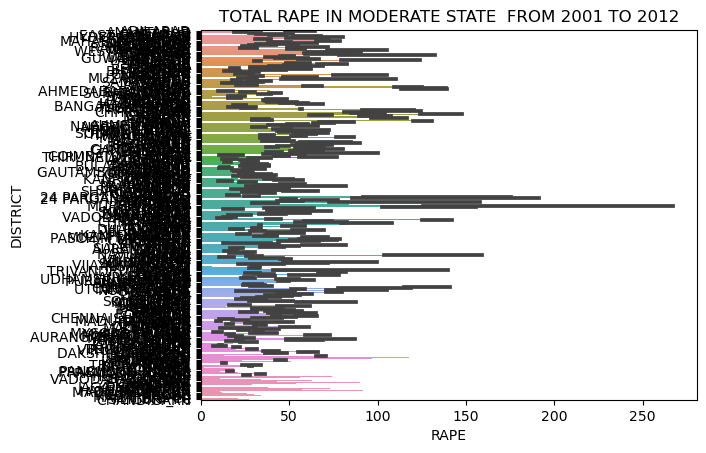

In [21]:
plt.title('TOTAL RAPE IN MODERATE STATE  FROM 2001 TO 2012')
sns.barplot(y='DISTRICT',x='RAPE',data=mod)

<Axes: title={'center': 'TOTAL DACOITY IN MODERATE STATE  FROM 2001 TO 2012'}, xlabel='DACOITY', ylabel='DISTRICT'>

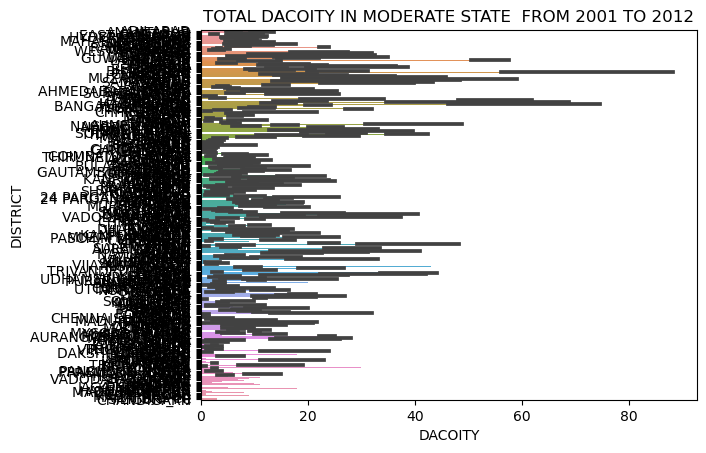

In [22]:
plt.title('TOTAL DACOITY IN MODERATE STATE  FROM 2001 TO 2012')
sns.barplot(y='DISTRICT',x='DACOITY',data=mod)

<Axes: title={'center': 'TOTAL CRIMES IN PEACEFULL STATE  FROM 2001 TO 2012'}, xlabel='TOTAL IPC CRIMES', ylabel='DISTRICT'>

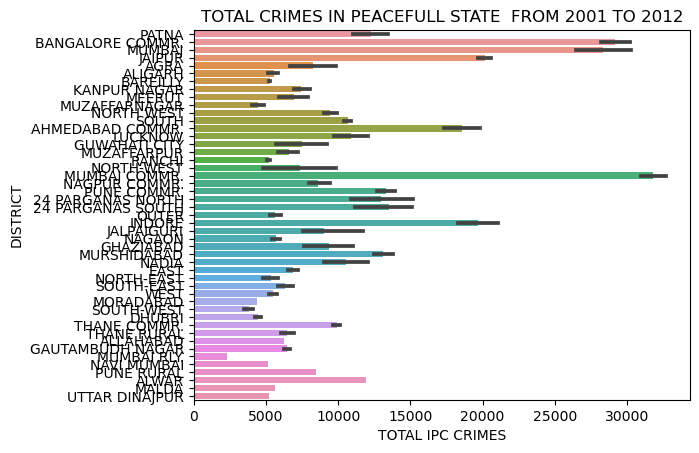

In [23]:
plt.title('TOTAL CRIMES IN PEACEFULL STATE  FROM 2001 TO 2012')
sns.barplot(y='DISTRICT',x='TOTAL IPC CRIMES',data=pea)

<Axes: title={'center': 'TOTAL MURDER IN PEACEFULL STATE  FROM 2001 TO 2012'}, xlabel='MURDER', ylabel='DISTRICT'>

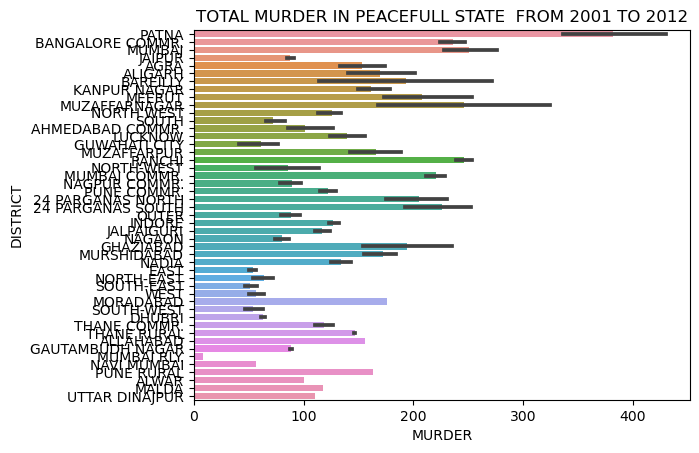

In [24]:
plt.title('TOTAL MURDER IN PEACEFULL STATE  FROM 2001 TO 2012')
sns.barplot(y='DISTRICT',x='MURDER',data=pea)

<Axes: title={'center': 'TOTAL RAPE IN PEACEFULL STATE  FROM 2001 TO 2012'}, xlabel='RAPE', ylabel='DISTRICT'>

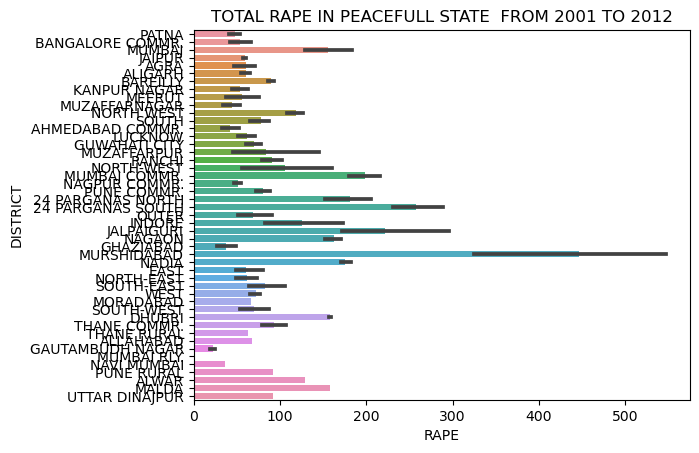

In [25]:
plt.title('TOTAL RAPE IN PEACEFULL STATE  FROM 2001 TO 2012')
sns.barplot(y='DISTRICT',x='RAPE',data=pea)

<Axes: title={'center': 'TOTAL DACOITY IN PEACEFULL STATE  FROM 2001 TO 2012'}, xlabel='DACOITY', ylabel='DISTRICT'>

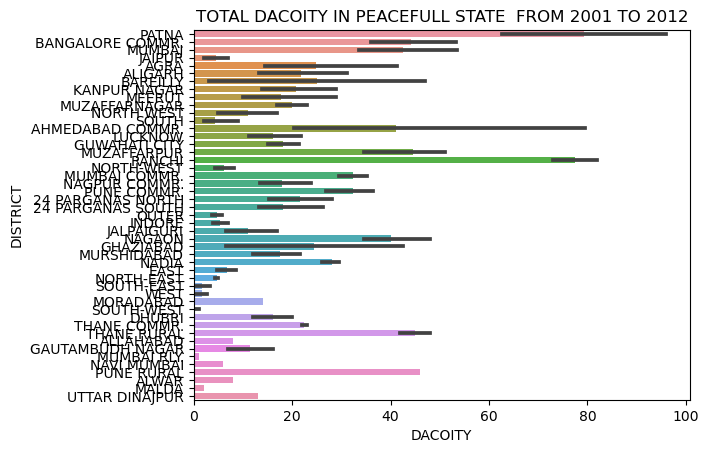

In [26]:
plt.title('TOTAL DACOITY IN PEACEFULL STATE  FROM 2001 TO 2012')
sns.barplot(y='DISTRICT',x='DACOITY',data=pea)

# Analysis on STATE Wise 

In [27]:
# firstly load the data set once again 

In [28]:
state=pd.read_csv('collected_data.csv')

In [29]:
state

,STATE/UT,YEAR,POPULATION IN MILIONS,AVERAGE LITERACY RATE IN %,AREA(KM2),SEX RATIO,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,2001,75.73,66.40,162975,978,2602,1555,136,871,...,872,34947,420,3544,2271,5791,7,7400,34344,130089
1,ARUNACHAL PRADESH,2001,1.09,66.95,83743,993,83,53,3,33,...,13,466,0,78,3,11,0,0,618,2342
2,ASSAM,2001,26.64,73.18,75438,935,1356,481,40,817,...,441,5805,59,850,4,1248,0,2010,9315,36877
3,BIHAR,2001,82.88,69.82,94163,919,3643,3419,250,888,...,502,7544,859,562,21,1558,83,2406,36667,88432
4,CHHATTISGARH,2001,20.80,71.04,135194,777,880,529,45,959,...,215,5477,70,1763,161,840,0,689,15790,38460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,D & N HAVELI,2012,0.23,79.65,603,774,7,2,0,3,...,12,25,0,2,0,0,0,23,112,318
416,DAMAN & DIU,2012,0.17,89.10,112,618,3,5,0,5,...,11,17,0,0,0,3,0,38,46,239
417,DELHI UT,2012,13.79,88.34,1484,868,1042,878,164,1412,...,158,3494,268,1454,416,3970,0,1826,30816,108574
418,LAKSHADWEEP,2012,0.07,94.28,32,946,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60


In [30]:
state.shape

(420, 36)

in this data set the values is  SUM of all Crimes of year wise, so that there are  420 rows and 36 columns including PULATION IN MILIONS, AVERAGE LITERACY RATE IN %, AREA(KM2), SEX RATIO 

### KMean Algorithm 

In [31]:
from sklearn.cluster import KMeans

# Prepare data for clustering (select relevant features)
X = state[['MURDER', 'RAPE', 'KIDNAPPING & ABDUCTION', 'DACOITY', 'ROBBERY']]

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the dataset
state['Cluster'] = clusters

In [32]:
# Separate data into clusters
s_sen = state[state['Cluster'] == 0]   # sen-> senitive area
s_mod = state[state['Cluster'] == 1]   # mod-> moderate area
s_pea = state[state['Cluster'] == 2]   # pea-> peaceful area

In [33]:
# THIS IS SENSTIVE STATE
s_sen

,STATE/UT,YEAR,POPULATION IN MILIONS,AVERAGE LITERACY RATE IN %,AREA(KM2),SEX RATIO,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Cluster
1,ARUNACHAL PRADESH,2001,1.09,66.95,83743,993,83,53,3,33,...,466,0,78,3,11,0,0,618,2342,0
4,CHHATTISGARH,2001,20.80,71.04,135194,777,880,529,45,959,...,5477,70,1763,161,840,0,689,15790,38460,0
5,GOA,2001,1.34,87.40,3702,961,36,30,5,12,...,174,2,17,7,11,0,191,697,2341,0
7,HARYANA,2001,21.08,76.64,44212,861,781,467,78,398,...,4744,285,478,401,1513,0,856,15906,38759,0
8,HIMACHAL PRADESH,2001,6.08,83.78,55673,968,119,75,11,124,...,1403,10,310,14,317,0,483,6052,11499,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,CHANDIGARH,2012,0.91,88.43,114,818,21,44,5,27,...,42,5,45,25,73,0,3,1042,3606,0
415,D & N HAVELI,2012,0.23,79.65,603,774,7,2,0,3,...,25,0,2,0,0,0,23,112,318,0
416,DAMAN & DIU,2012,0.17,89.10,112,618,3,5,0,5,...,17,0,0,0,3,0,38,46,239,0
418,LAKSHADWEEP,2012,0.07,94.28,32,946,0,0,0,0,...,3,0,1,0,1,0,0,32,60,0


In Sensitive Zone there are 249 rows

In [34]:
# THIS IS MODERATE STATE
s_mod

,STATE/UT,YEAR,POPULATION IN MILIONS,AVERAGE LITERACY RATE IN %,AREA(KM2),SEX RATIO,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Cluster
0,ANDHRA PRADESH,2001,75.73,66.40,162975,978,2602,1555,136,871,...,34947,420,3544,2271,5791,7,7400,34344,130089,1
2,ASSAM,2001,26.64,73.18,75438,935,1356,481,40,817,...,5805,59,850,4,1248,0,2010,9315,36877,1
6,GUJARAT,2001,50.60,79.31,196024,920,1226,537,94,286,...,13760,67,756,111,3667,0,2924,50719,103419,1
10,JHARKHAND,2001,26.91,66.40,79714,941,1507,866,143,567,...,2254,217,297,5,484,2,420,8777,25447,1
11,KARNATAKA,2001,52.73,75.60,191791,965,1626,1475,74,293,...,23285,220,1665,81,1755,0,100,47301,109098,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,KARNATAKA,2012,52.74,77.60,191791,973,1860,1923,71,621,...,20350,218,2978,100,3684,32,876,58468,134021,1
398,MADHYA PRADESH,2012,60.40,72.63,308252,931,2373,2332,114,3425,...,35549,743,6655,774,3988,6,7721,114585,220335,1
404,ODISHA,2012,36.72,75.45,155707,979,1548,1879,54,1458,...,8223,525,4187,304,2638,0,3605,22203,67957,1
406,RAJASTHAN,2012,56.48,69.06,342239,928,1461,1538,98,2049,...,17614,478,2352,18,13312,0,8284,70240,170948,1


In Moderate Zone there are 141 rows 

In [35]:
# THIS IS THE PEACEFUL STATE
s_pea

,STATE/UT,YEAR,POPULATION IN MILIONS,AVERAGE LITERACY RATE IN %,AREA(KM2),SEX RATIO,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Cluster
3,BIHAR,2001,82.88,69.82,94163,919,3643,3419,250,888,...,7544,859,562,21,1558,83,2406,36667,88432,2
25,UTTAR PRADESH,2001,166.05,69.72,240928,898,7601,7964,1186,1958,...,17816,2211,2870,2575,7365,0,7129,57839,178129,2
38,BIHAR,2002,82.88,69.82,94163,919,3712,3526,396,1040,...,8770,927,621,6,1577,38,2497,39145,94040,2
60,UTTAR PRADESH,2002,166.05,69.72,240928,898,6825,6283,1243,1415,...,13947,1893,2145,1887,5679,0,7313,48569,146037,2
73,BIHAR,2003,82.88,69.82,94163,919,3771,3540,298,985,...,8884,909,688,11,1880,37,2574,37503,92263,2
95,UTTAR PRADESH,2003,166.05,69.72,240928,898,5284,3793,1525,911,...,7760,1322,1098,4970,2626,0,4428,29449,95073,2
108,BIHAR,2004,82.88,69.82,94163,919,3948,2995,280,1390,...,11231,1029,704,13,2679,35,2405,44178,108060,2
130,UTTAR PRADESH,2004,166.05,69.72,240928,898,6126,5580,1436,1397,...,11265,1708,1900,2682,4950,3,7136,40711,130181,2
143,BIHAR,2005,82.88,69.82,94163,919,3471,3307,259,1147,...,11939,1014,451,13,1574,74,2680,40057,97850,2
165,UTTAR PRADESH,2005,166.05,69.72,240928,898,5711,5637,1520,1217,...,10379,1564,1835,2881,4505,0,7406,37158,122108,2


in Peaceful Zone there are 30 rows

<Axes: title={'center': 'TOTAL CRIMES IN  SENSITIVE STATES/UT FROM 2001 TO 2012'}, xlabel='TOTAL IPC CRIMES', ylabel='STATE/UT'>

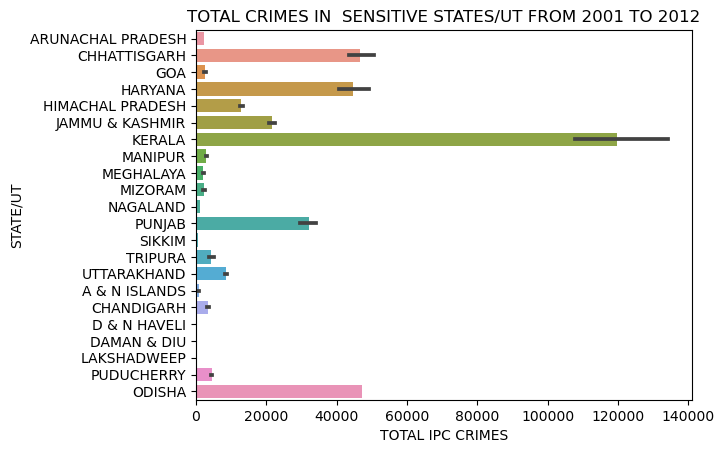

In [37]:
plt.title('TOTAL CRIMES IN  SENSITIVE STATES/UT FROM 2001 TO 2012')
sns.barplot(y='STATE/UT',x='TOTAL IPC CRIMES',data=s_sen)

<Axes: title={'center': 'TOTAL MURDER IN  SENSITIVE STATES/UT FROM 2001 TO 2012'}, xlabel='MURDER', ylabel='STATE/UT'>

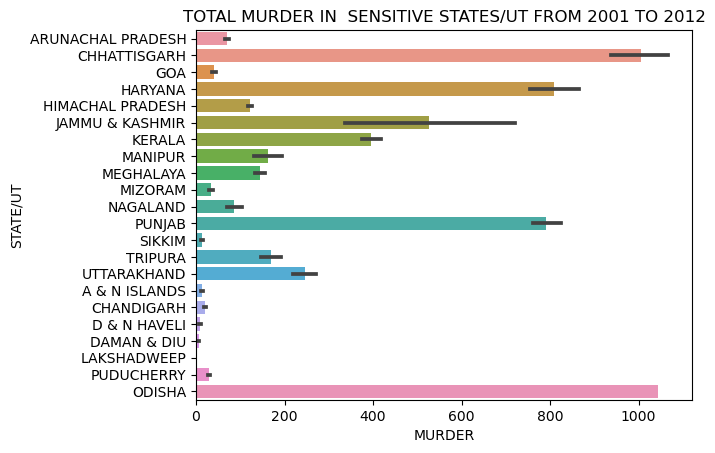

In [38]:
plt.title('TOTAL MURDER IN  SENSITIVE STATES/UT FROM 2001 TO 2012')
sns.barplot(y='STATE/UT',x='MURDER',data=s_sen)

<Axes: title={'center': 'TOTAL RAPE IN  SENSITIVE STATES/UT FROM 2001 TO 2012'}, xlabel='RAPE', ylabel='STATE/UT'>

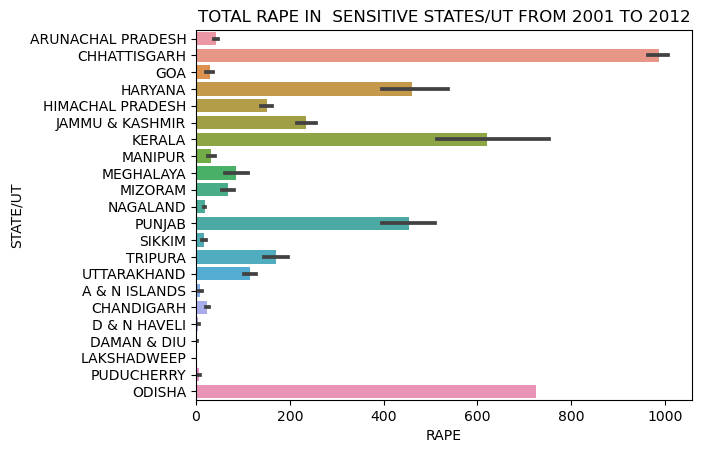

In [39]:
plt.title('TOTAL RAPE IN  SENSITIVE STATES/UT FROM 2001 TO 2012')
sns.barplot(y='STATE/UT',x='RAPE',data=s_sen)

<Axes: title={'center': 'TOTAL CRIMES IN  MODERATE STATES/UT FROM 2001 TO 2012'}, xlabel='TOTAL IPC CRIMES', ylabel='STATE/UT'>

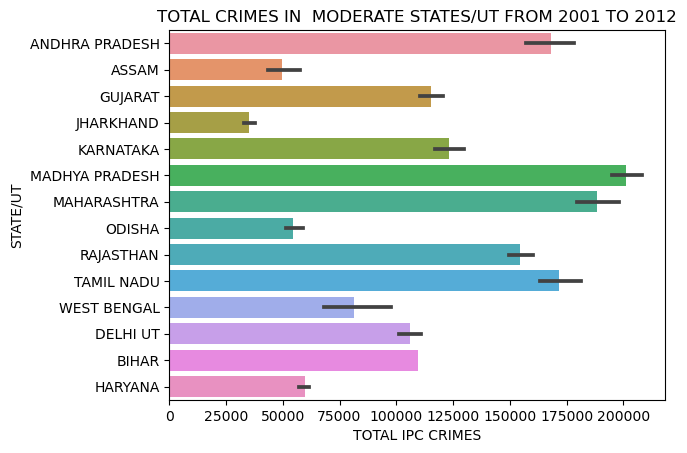

In [40]:
plt.title('TOTAL CRIMES IN  MODERATE STATES/UT FROM 2001 TO 2012')
sns.barplot(y='STATE/UT',x='TOTAL IPC CRIMES',data=s_mod)

<Axes: title={'center': 'TOTAL MURDER IN  MODERATE STATES/UT FROM 2001 TO 2012'}, xlabel='MURDER', ylabel='STATE/UT'>

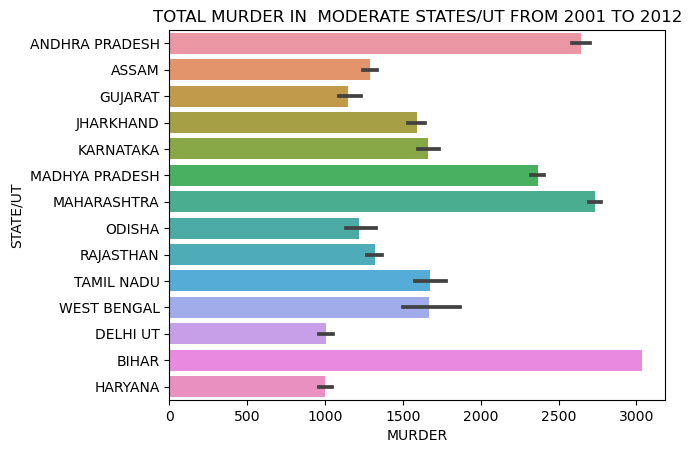

In [41]:
plt.title('TOTAL MURDER IN  MODERATE STATES/UT FROM 2001 TO 2012')
sns.barplot(y='STATE/UT',x='MURDER',data=s_mod)

<Axes: title={'center': 'TOTAL RAPE IN  MODERATE STATES/UT FROM 2001 TO 2012'}, xlabel='RAPE', ylabel='STATE/UT'>

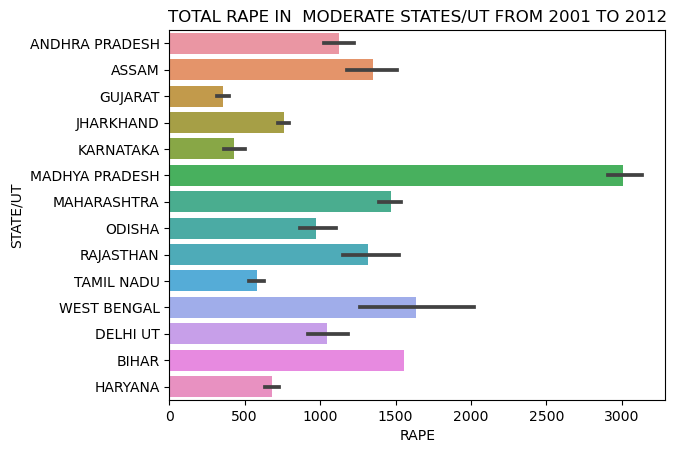

In [42]:
plt.title('TOTAL RAPE IN  MODERATE STATES/UT FROM 2001 TO 2012')
sns.barplot(y='STATE/UT',x='RAPE',data=s_mod)

<Axes: title={'center': 'TOTAL CRIMES IN  PEACEFUL STATES/UT FROM 2001 TO 2012'}, xlabel='TOTAL IPC CRIMES', ylabel='STATE/UT'>

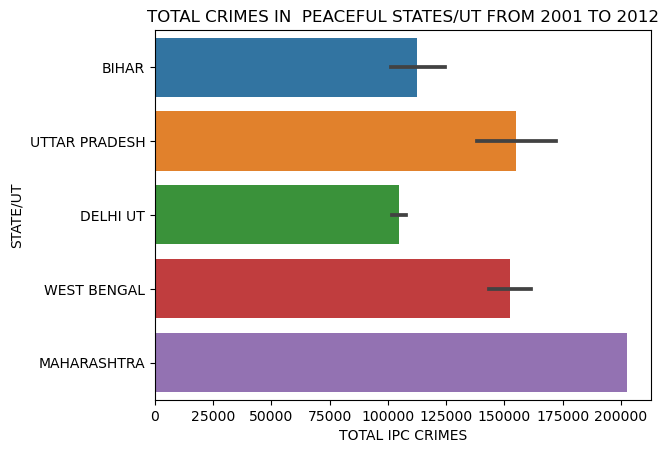

In [43]:
plt.title('TOTAL CRIMES IN  PEACEFUL STATES/UT FROM 2001 TO 2012')
sns.barplot(y='STATE/UT',x='TOTAL IPC CRIMES',data=s_pea)

<Axes: title={'center': 'TOTAL MURDER IN  PEACEFUL STATES/UT FROM 2001 TO 2012'}, xlabel='MURDER', ylabel='STATE/UT'>

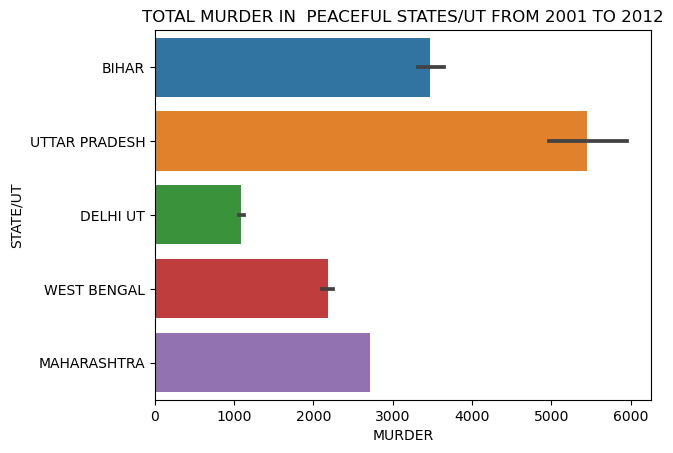

In [44]:
plt.title('TOTAL MURDER IN  PEACEFUL STATES/UT FROM 2001 TO 2012')
sns.barplot(y='STATE/UT',x='MURDER',data=s_pea)

<Axes: title={'center': 'TOTAL RAPE IN  PEACEFUL STATES/UT FROM 2001 TO 2012'}, xlabel='RAPE', ylabel='STATE/UT'>

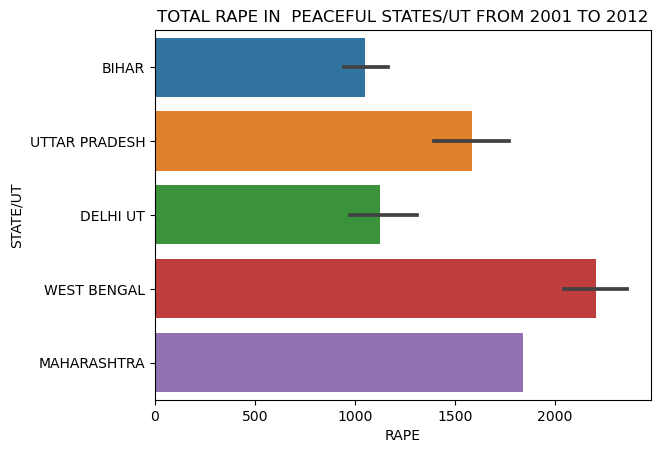

In [45]:
plt.title('TOTAL RAPE IN  PEACEFUL STATES/UT FROM 2001 TO 2012')
sns.barplot(y='STATE/UT',x='RAPE',data=s_pea)

Recommendations:

Addressing Sensitive Areas:

Allocate additional resources and law enforcement personnel to tackle high crime rates in sensitive areas.
Implement targeted interventions to address underlying factors contributing to crime, such as poverty, unemployment,literacy rate and social inequality.

Maintaining Moderate Areas:

Implement community policing initiatives to enhance trust and collaboration between law enforcement agencies and local communities.
Focus on crime prevention programs and youth engagement activities to deter criminal activities in moderate areas.

Sustaining Peaceful Areas:

Continue proactive policing efforts and community engagement initiatives to maintain the low crime rates in peaceful areas.
Invest in infrastructure development and social programs to further enhance the quality of life and safety in these areas.

### Thanks
* Navin Singh